In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# config

In [2]:
WORD_LIST = ["god", "jesus", "queen", "king", "woman", "man", "river", "tree", "horse"]

# load vectors

In [3]:
def load_vectors(path_list):
    vector_dict_list = []
    for path in path_list:
        with open(path, "rb") as f:
            vector_dict_list.append(pickle.load(f))
    return vector_dict_list

vf, vg, vw = load_vectors(["/veld/input/fasttext/m1.pkl", "/veld/input/glove/m1.pkl", "/veld/input/word2vec/m1.pkl"])
print("len(vf):", len(vf))
print("len(vg):", len(vg))
print("len(vw):", len(vw))

len(vf): 5278
len(vg): 5278
len(vw): 5277


# check similarities

In [4]:
def get_cosine_similarity_of_vectors(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [5]:
def compare_words(vector_dict):
    for i1, w1 in enumerate(WORD_LIST):
        for w2 in WORD_LIST[i1:]:
            print(w1, w2, get_cosine_similarity_of_vectors(vector_dict[w1], vector_dict[w2]))

print("- fasttext ------------------------------")
compare_words(vf)
print("- glove ---------------------------------")
compare_words(vg)
print("- word2vec ------------------------------")
compare_words(vw)

- fasttext ------------------------------
god god 0.9999999
god jesus 0.40744984
god queen 0.11737837
god king 0.2660632
god woman 0.14505838
god man 0.30001107
god river 0.11564112
god tree 0.12895098
god horse 0.13661169
jesus jesus 1.0
jesus queen 0.14048503
jesus king 0.09260015
jesus woman 0.19510038
jesus man 0.2957224
jesus river 0.033126697
jesus tree 0.12615348
jesus horse 0.0824222
queen queen 1.0
queen king 0.41390175
queen woman 0.14843608
queen man 0.046034593
queen river 0.17026715
queen tree 0.09351479
queen horse 0.0696299
king king 1.0
king woman 0.15584476
king man 0.22832648
king river 0.2597148
king tree 0.10816867
king horse 0.23465073
woman woman 1.0
woman man 0.376941
woman river 0.02193123
woman tree 0.17338428
woman horse 0.16794287
man man 1.0000001
man river 0.05550797
man tree 0.1873453
man horse 0.1664759
river river 1.0000001
river tree 0.1282892
river horse 0.17797607
tree tree 1.0
tree horse 0.066066794
horse horse 1.0
- glove ---------------------------

# PCA plot

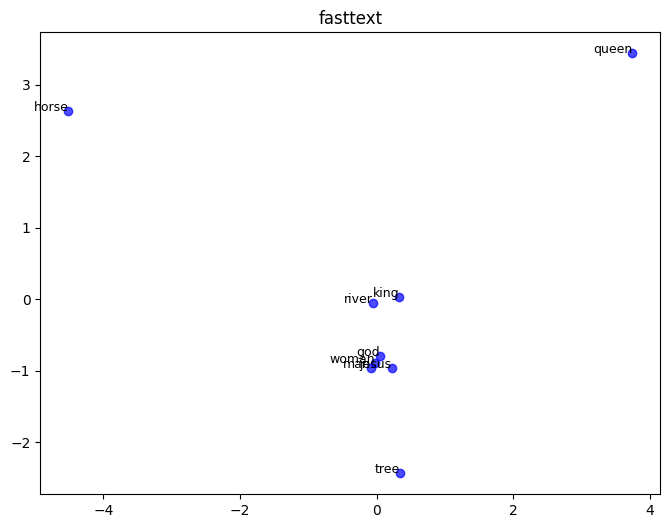

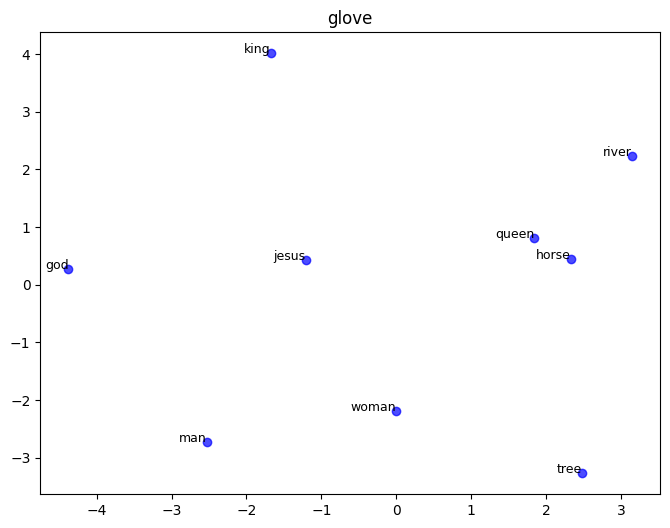

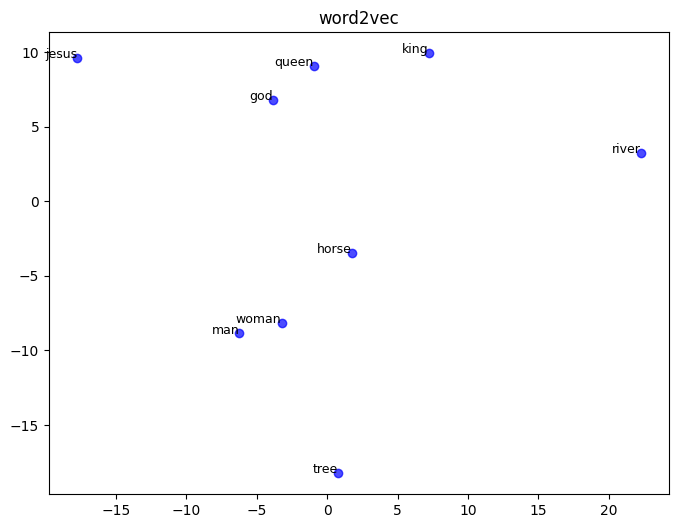

In [6]:
def show_plot_pca(vector_dict, title):

    # get labels and values
    labels = []
    values = []
    for w in WORD_LIST:
        labels.append(w)
        values.append(vector_dict[w])
    values = np.array(values)
    
    # reduce
    pca = PCA(n_components=2)
    reduced_vectors_pca = pca.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], c='blue', alpha=0.7)

    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_pca[i, 0], 
            reduced_vectors_pca[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )
        
    # plot
    plt.title(title)
    plt.show()

show_plot_pca(vf, "fasttext")
show_plot_pca(vg, "glove")
show_plot_pca(vw, "word2vec")